In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("DMdata.csv").dropna()
pd.set_option("display.max_columns", None)
df.head()

,有無毒,菌褶顏色,菌褶剖面,菌褶間距,菌蓋表面,菌環數量,孢子色,氣味,菌蓋顏色,擦傷
0,0,10,2,1,3,1,6,0,8,0
1,0,10,2,1,3,1,1,0,8,0
2,0,7,2,1,3,1,6,0,8,0
3,0,7,2,1,3,1,1,0,8,0
4,0,1,2,1,3,1,6,0,8,0


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

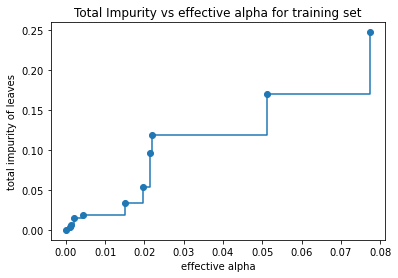

In [2]:
#切分資料集
X = df.drop(['有無毒'],axis=1)
y = df['有無毒']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
clf = DecisionTreeClassifier(random_state=21)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [3]:
#csv寫入 alpha_0.csv
clf=clf.fit(X_train,y_train)
pred_output = clf.predict(X_test, check_input=True)
try:                      
    pred_output.tofile('predit_alpha_0.csv',sep=',\n')
    print('輸出predit_alpha_0.csv檔案完成')
except:                   
    print('請重新嘗試')

輸出predit_alpha_0.csv檔案完成


In [4]:
#訓練
clf.score(X_train,y_train)

1.0

In [5]:
#測試
clf.score(X_test,y_test)

1.0

[Text(0.46130952380952384, 0.9444444444444444, 'X[5] <= 2.5\ngini = 0.498\nsamples = 6732\nvalue = [3596, 3136]'),
 Text(0.19047619047619047, 0.8333333333333334, 'X[6] <= 6.5\ngini = 0.191\nsamples = 3320\nvalue = [2965, 355]'),
 Text(0.14285714285714285, 0.7222222222222222, 'X[6] <= 4.0\ngini = 0.093\nsamples = 3117\nvalue = [2965, 152]'),
 Text(0.09523809523809523, 0.6111111111111112, 'X[8] <= 0.5\ngini = 0.324\nsamples = 748\nvalue = [596, 152]'),
 Text(0.047619047619047616, 0.5, 'gini = 0.0\nsamples = 596\nvalue = [596, 0]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.0\nsamples = 152\nvalue = [0, 152]'),
 Text(0.19047619047619047, 0.6111111111111112, 'gini = 0.0\nsamples = 2369\nvalue = [2369, 0]'),
 Text(0.23809523809523808, 0.7222222222222222, 'gini = 0.0\nsamples = 203\nvalue = [0, 203]'),
 Text(0.7321428571428571, 0.8333333333333334, 'X[4] <= 1.5\ngini = 0.301\nsamples = 3412\nvalue = [631, 2781]'),
 Text(0.5595238095238095, 0.7222222222222222, 'X[2] <= 0.5\ngini = 0.138\nsampl

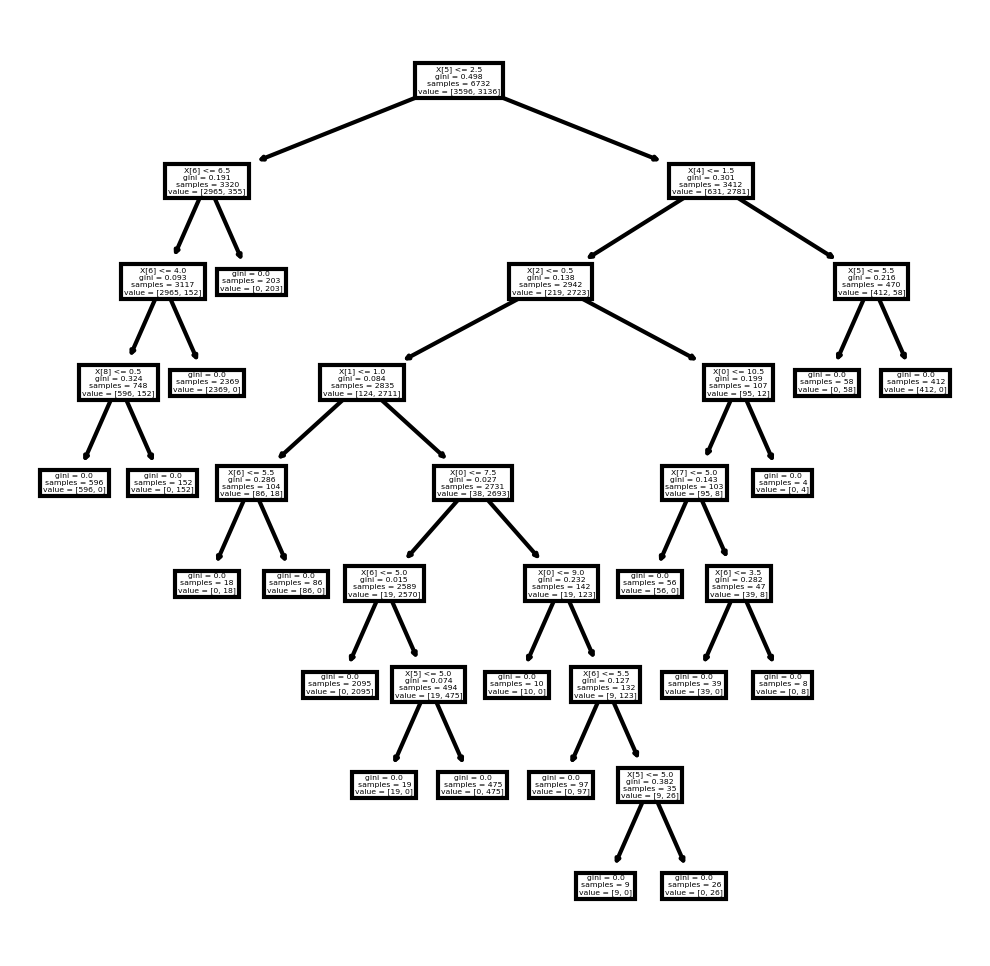

In [6]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf)

In [7]:
#csv寫入 測試資料集
answer_output=[]
try:                      
    for i in y:
        answer_output.append(i)
    answer_output = np.array(answer_output)
    pred_output.tofile('testdata.csv',sep=',\n')
    print('輸出testdata.csv檔案完成')
except:                   
    print('請重新嘗試')

輸出testdata.csv檔案完成


In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=21, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25068201421660885


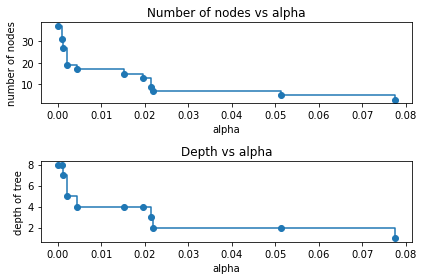

In [9]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [10]:
#查看alpha值跟準確度的關聯

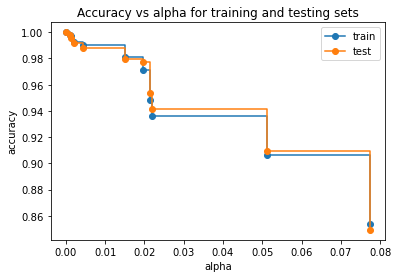

In [11]:
train_scores = [clf1.score(X_train, y_train) for clf1 in clfs]
test_scores = [clf1.score(X_test, y_test) for clf1 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
#第二種節點數

In [13]:
#csv寫入 alpha_0.05.csv
dt2 = tree.DecisionTreeClassifier(ccp_alpha=0.05,random_state=21)
clf2=dt2.fit(X_train,y_train)
pred_output = clf2.predict(X_test, check_input=True)
try:                      
    pred_output.tofile('predit_alpha_0.05.csv',sep=',\n')
    print('輸出predit_alpha_0.05.csv檔案完成')
except:                   
    print('請重新嘗試')

輸出predit_alpha_0.05.csv檔案完成


In [14]:
#訓練
dt2.score(X_train,y_train)

0.9362745098039216

In [15]:
#測試
dt2.score(X_test,y_test)

0.9412114014251781

[Text(0.5, 0.8333333333333334, 'X[5] <= 2.5\ngini = 0.498\nsamples = 6732\nvalue = [3596, 3136]'),
 Text(0.25, 0.5, 'X[6] <= 6.5\ngini = 0.191\nsamples = 3320\nvalue = [2965, 355]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.093\nsamples = 3117\nvalue = [2965, 152]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 203\nvalue = [0, 203]'),
 Text(0.75, 0.5, 'X[4] <= 1.5\ngini = 0.301\nsamples = 3412\nvalue = [631, 2781]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.138\nsamples = 2942\nvalue = [219, 2723]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.216\nsamples = 470\nvalue = [412, 58]')]

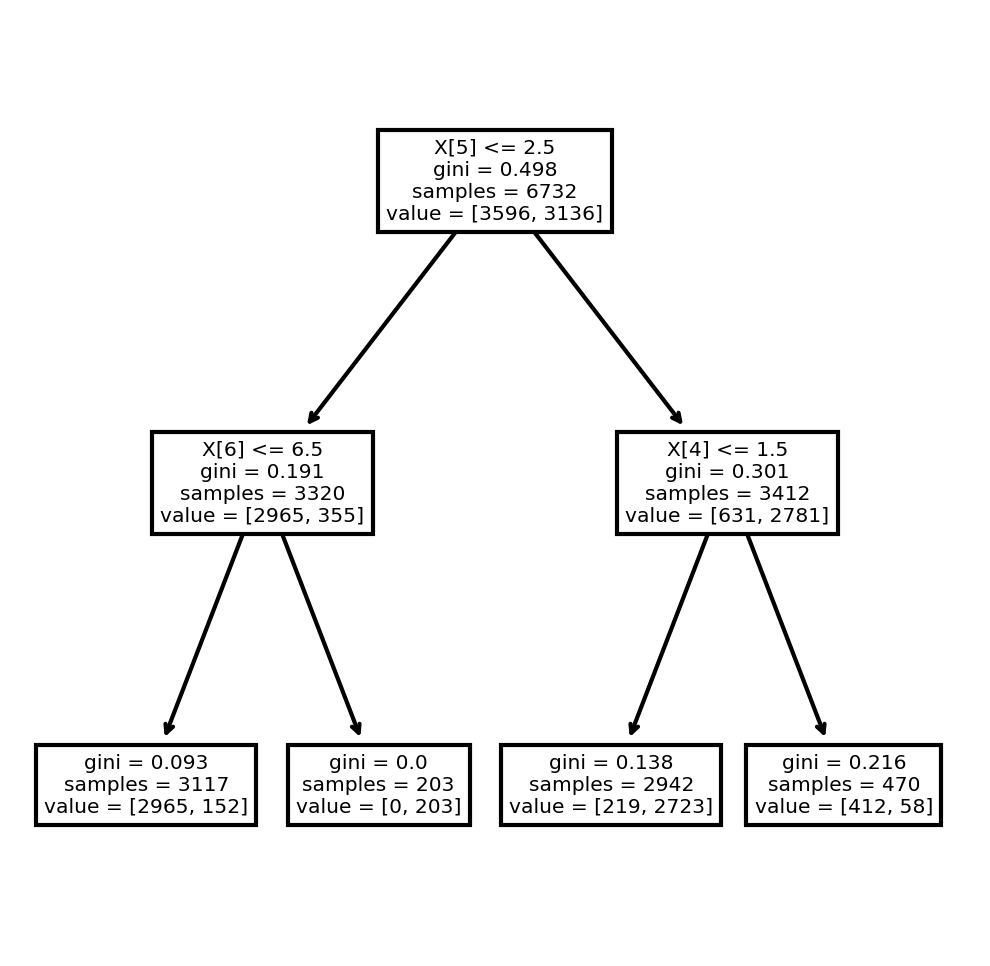

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf2)

In [17]:
#第三種節點數

In [18]:
dt3 = tree.DecisionTreeClassifier(ccp_alpha=0.1,random_state=21)
clf3=dt3.fit(X_train,y_train)
pred_output = clf3.predict(X_test, check_input=True)
try:                      
    pred_output.tofile('predit_alpha_0.1.csv',sep=',\n')
    print('輸出predit_alpha_0.1.csv檔案完成')
except:                   
    print('請重新嘗試')

輸出predit_alpha_0.1.csv檔案完成


In [19]:
#訓練
dt3.score(X_train,y_train)

0.8535353535353535

In [20]:
#測試
dt3.score(X_test,y_test)

0.8491686460807601

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf3)